In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
df = pd.read_parquet('data/LDAP-training.parquet')
df = pd.concat([df, pd.read_parquet('data/LDAP-testing.parquet')])
df = pd.concat([df, pd.read_parquet('data/NetBIOS-training.parquet')])
df = pd.concat([df, pd.read_parquet('data/NetBIOS-testing.parquet')])
df['Label'].value_counts()

Label
Benign           8836
LDAP             1884
DrDoS_LDAP       1440
NetBIOS           644
DrDoS_NetBIOS     598
Name: count, dtype: int64

In [18]:
# mpa each label to a number
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Label'])
df['Label'] = le.transform(df['Label'])

In [19]:
# perform LDA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Label', axis=1), df['Label'], test_size=0.2, random_state=42)

# perform LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# make predictions
y_pred = lda.predict(X_test)

# calculate accuracy
accuracy_score(y_test, y_pred)

0.856396866840731

<Axes: >

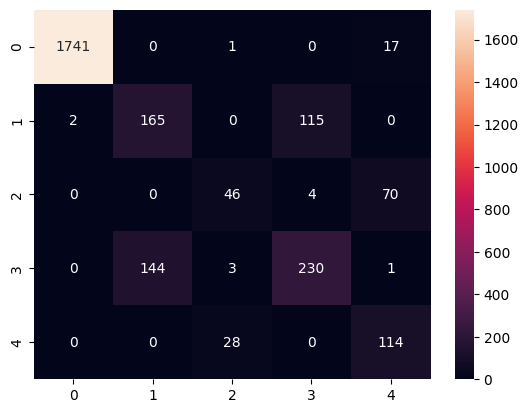

In [20]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

<Axes: title={'center': 'Predicted Labels'}, ylabel='count'>

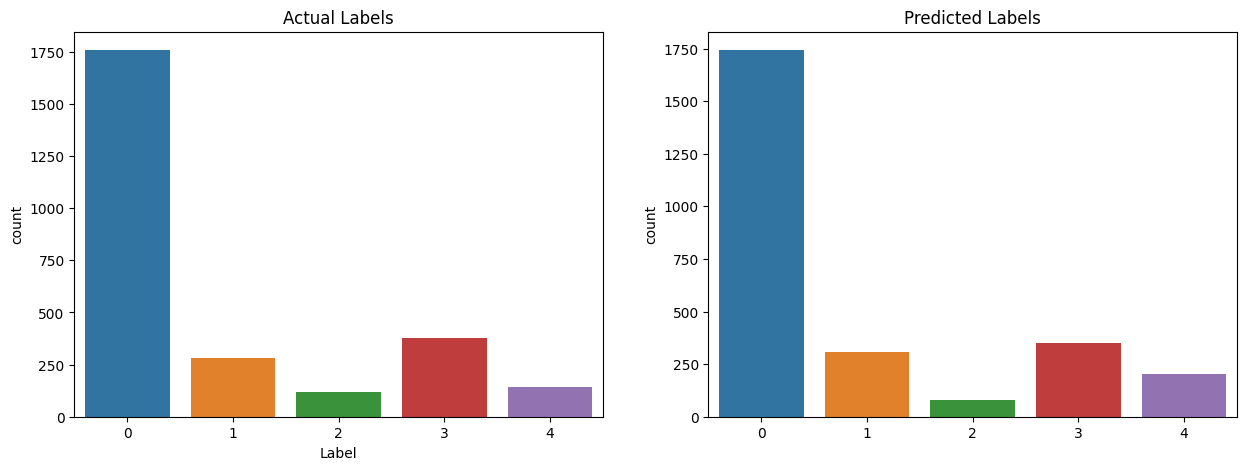

In [22]:
# plot side by side the actual and predicted labels
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('Actual Labels')
# If using all scalar values, you must pass an index
sns.countplot(x=y_test)
plt.subplot(1, 2, 2)
plt.title('Predicted Labels')
sns.countplot(x=y_pred)